comparing regional CS2_CPOM and SM-LG smoothed anomalies for 2010-2020 seasons 1 Dec - 30 Apr

In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec
import datetime
import seaborn as sns
import os
import tqdm
import warnings
warnings.filterwarnings("ignore")

# air temperature

In [2]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_ERA5_temp_regional_anomalies_smoothed.csv',header=[0,1,2])
regions = ['Baffin','Greenland','Barents','Kara','Laptev','Sib','Chuk','Bea','Can','Cen']
random_SM = ['Unnamed: 41_level_2','Unnamed: 42_level_2','Unnamed: 43_level_2','Unnamed: 44_level_2','Unnamed: 45_level_2',
             'Unnamed: 46_level_2','Unnamed: 47_level_2','Unnamed: 48_level_2','Unnamed: 49_level_2','Unnamed: 50_level_2']
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019',
          '2019-2020']

dates = df['Unnamed: 0_level_0']['Unnamed: 0_level_1']['Date']

# 1 Oct - 30 April
days = [np.arange(273,484), # 2010-2011
        np.arange(638,850), # 2011-2012
        np.arange(1004,1215), # 2012-2013
        np.arange(1369,1580), # 2013-2014
        np.arange(1734,1945), # 2014-2015
        np.arange(2099,2311), # 2015-2016
        np.arange(2464,2676), # 2016-2017
        np.arange(2830,3041), # 2017-2018
        np.arange(3194,3406), # 2018-2019
        np.arange(3560,3772) # 2019-2020
       ]


In [3]:
def stats():
    fb = df[sat][region][rando_C][day].squeeze()
    snow = df['ERA5_temp'][region][rando_S][day].squeeze()
    mask = ~np.isnan(fb) & ~np.isnan(snow) 
    try:
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        return(p,r)
        print(region,': r = ',r, ' , p = ',p)
    except:
        print(region,': no data')

In [4]:
Baf = {}
Green = {}
Bar = {}
Kara = {}
Laptev = {}
Sib = {} 
Chuk = {} 
Bea = {}
Can = {}
Cen = {}

ps_temp = np.full((10,10),np.nan)

counters = np.arange(0,10)

dics = [Baf,Green,Bar,Kara,Laptev,Sib,Chuk,Bea,Can,Cen]

random_CPOM = ['Unnamed: 21_level_2','Unnamed: 22_level_2','Unnamed: 23_level_2','Unnamed: 24_level_2','Unnamed: 25_level_2',
               'Unnamed: 26_level_2','Unnamed: 27_level_2','Unnamed: 28_level_2','Unnamed: 29_level_2','Unnamed: 30_level_2']
sat = 'CS2_CPOM'
    
for region, rando_C, rando_S, dic, counter in zip(regions, random_CPOM, random_SM, dics, counters):
    for season, day, count in zip(seasons, days, counters):
        p,r = stats()
        dic[season] = r
        ps_temp[count,counter] = p

df_Baf = pd.DataFrame.from_dict(Baf, columns=[' '], orient = 'index')
df_Green = pd.DataFrame.from_dict(Green, columns=[' '], orient = 'index')
df_Bar = pd.DataFrame.from_dict(Bar, columns=[' '], orient = 'index')
df_Kara = pd.DataFrame.from_dict(Kara, columns=[' '], orient = 'index')
df_Laptev = pd.DataFrame.from_dict(Laptev, columns=[' '], orient = 'index')
df_Sib = pd.DataFrame.from_dict(Sib, columns=[' '], orient = 'index')
df_Chuk = pd.DataFrame.from_dict(Chuk, columns=[' '], orient = 'index')
df_Bea = pd.DataFrame.from_dict(Bea, columns=[' '], orient = 'index')
df_Can = pd.DataFrame.from_dict(Can, columns=[' '], orient = 'index')
df_Cen = pd.DataFrame.from_dict(Cen, columns=[' '], orient = 'index')

In [5]:
sets = [df_Baf,df_Green,df_Bar,df_Kara,df_Laptev,df_Sib,df_Chuk,df_Bea,df_Can,df_Cen] 

df_temp = pd.concat(
    [df.rename(columns=lambda x: x.zfill(0)) for df in sets],
    keys=['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic'],
    axis=1)

In [6]:
df_temp

,Baffin,Greenland,Barents,Kara,Laptev,E. Siberian,Chukchi,Beaufort,Can. Arch.,Central Arctic
,,,,,,,,,,
2010-2011,0.26,-0.17,0.20,0.36,0.32,0.80,0.23,0.37,0.09,0.24
2011-2012,0.26,0.09,0.46,0.13,0.58,-0.02,-0.16,0.36,0.19,0.19
2012-2013,0.14,-0.46,0.05,-0.02,0.38,0.69,0.19,0.23,0.34,0.50
2013-2014,0.07,0.28,-0.04,0.16,0.43,0.55,0.16,0.35,0.52,0.16
2014-2015,-0.16,0.02,0.29,-0.10,0.39,0.37,-0.11,-0.00,0.05,0.40
2015-2016,-0.00,0.26,0.51,-0.04,0.37,0.30,-0.04,0.15,0.36,0.13
2016-2017,-0.14,0.15,0.35,0.00,0.08,0.06,0.12,0.20,-0.21,0.32
2017-2018,-0.11,0.33,0.56,0.16,0.47,0.45,-0.07,0.39,0.19,0.33
2018-2019,0.07,0.05,0.16,-0.36,0.52,0.64,-0.20,0.38,0.21,0.21


# wind speed

In [7]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_ERA5_wind_regional_anomalies_smoothed.csv',header=[0,1,2])

Baf = {}
Green = {}
Bar = {}
Kara = {}
Laptev = {}
Sib = {} 
Chuk = {} 
Bea = {}
Can = {}
Cen = {}

ps_wind = np.full((10,10),np.nan)

counters = np.arange(0,10)

dics = [Baf,Green,Bar,Kara,Laptev,Sib,Chuk,Bea,Can,Cen]
    
for region, rando_C, rando_S, dic, counter in zip(regions, random_CPOM, random_SM, dics, counters):
    for season, day, count in zip(seasons, days, counters):
        p,r = stats()
        dic[season] = r
        ps_wind[count,counter] = p

df_Baf = pd.DataFrame.from_dict(Baf, columns=[' '], orient = 'index')
df_Green = pd.DataFrame.from_dict(Green, columns=[' '], orient = 'index')
df_Bar = pd.DataFrame.from_dict(Bar, columns=[' '], orient = 'index')
df_Kara = pd.DataFrame.from_dict(Kara, columns=[' '], orient = 'index')
df_Laptev = pd.DataFrame.from_dict(Laptev, columns=[' '], orient = 'index')
df_Sib = pd.DataFrame.from_dict(Sib, columns=[' '], orient = 'index')
df_Chuk = pd.DataFrame.from_dict(Chuk, columns=[' '], orient = 'index')
df_Bea = pd.DataFrame.from_dict(Bea, columns=[' '], orient = 'index')
df_Can = pd.DataFrame.from_dict(Can, columns=[' '], orient = 'index')
df_Cen = pd.DataFrame.from_dict(Cen, columns=[' '], orient = 'index')

In [8]:
sets = [df_Baf,df_Green,df_Bar,df_Kara,df_Laptev,df_Sib,df_Chuk,df_Bea,df_Can,df_Cen] 

df_wind = pd.concat(
    [df.rename(columns=lambda x: x.zfill(0)) for df in sets],
    keys=['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic'],
    axis=1)

In [9]:
df_wind

,Baffin,Greenland,Barents,Kara,Laptev,E. Siberian,Chukchi,Beaufort,Can. Arch.,Central Arctic
,,,,,,,,,,
2010-2011,-0.36,0.40,0.34,0.21,-0.03,-0.09,-0.10,0.22,0.50,0.15
2011-2012,0.20,-0.01,-0.01,0.19,0.11,-0.19,-0.07,-0.06,-0.09,0.51
2012-2013,-0.07,0.43,0.29,0.23,-0.18,-0.06,-0.08,0.22,0.28,0.37
2013-2014,-0.17,-0.05,-0.07,-0.03,-0.31,-0.30,-0.03,0.29,0.70,0.05
2014-2015,0.14,0.44,0.24,0.03,0.33,0.04,0.29,0.03,0.26,0.53
2015-2016,0.28,0.18,0.10,0.29,0.23,0.36,-0.03,-0.30,0.16,0.25
2016-2017,0.10,0.14,0.27,0.15,-0.13,-0.02,0.25,0.17,0.03,0.23
2017-2018,0.27,0.04,0.39,-0.08,0.20,0.22,0.16,0.59,0.08,0.50
2018-2019,-0.01,0.03,-0.14,-0.15,0.42,-0.12,-0.16,0.32,0.33,0.38


In [10]:
# create figure

In [11]:
%%capture output
x = plt.imshow(np.full((3,3),np.nan),vmin=-1,vmax=1,cmap='RdBu')

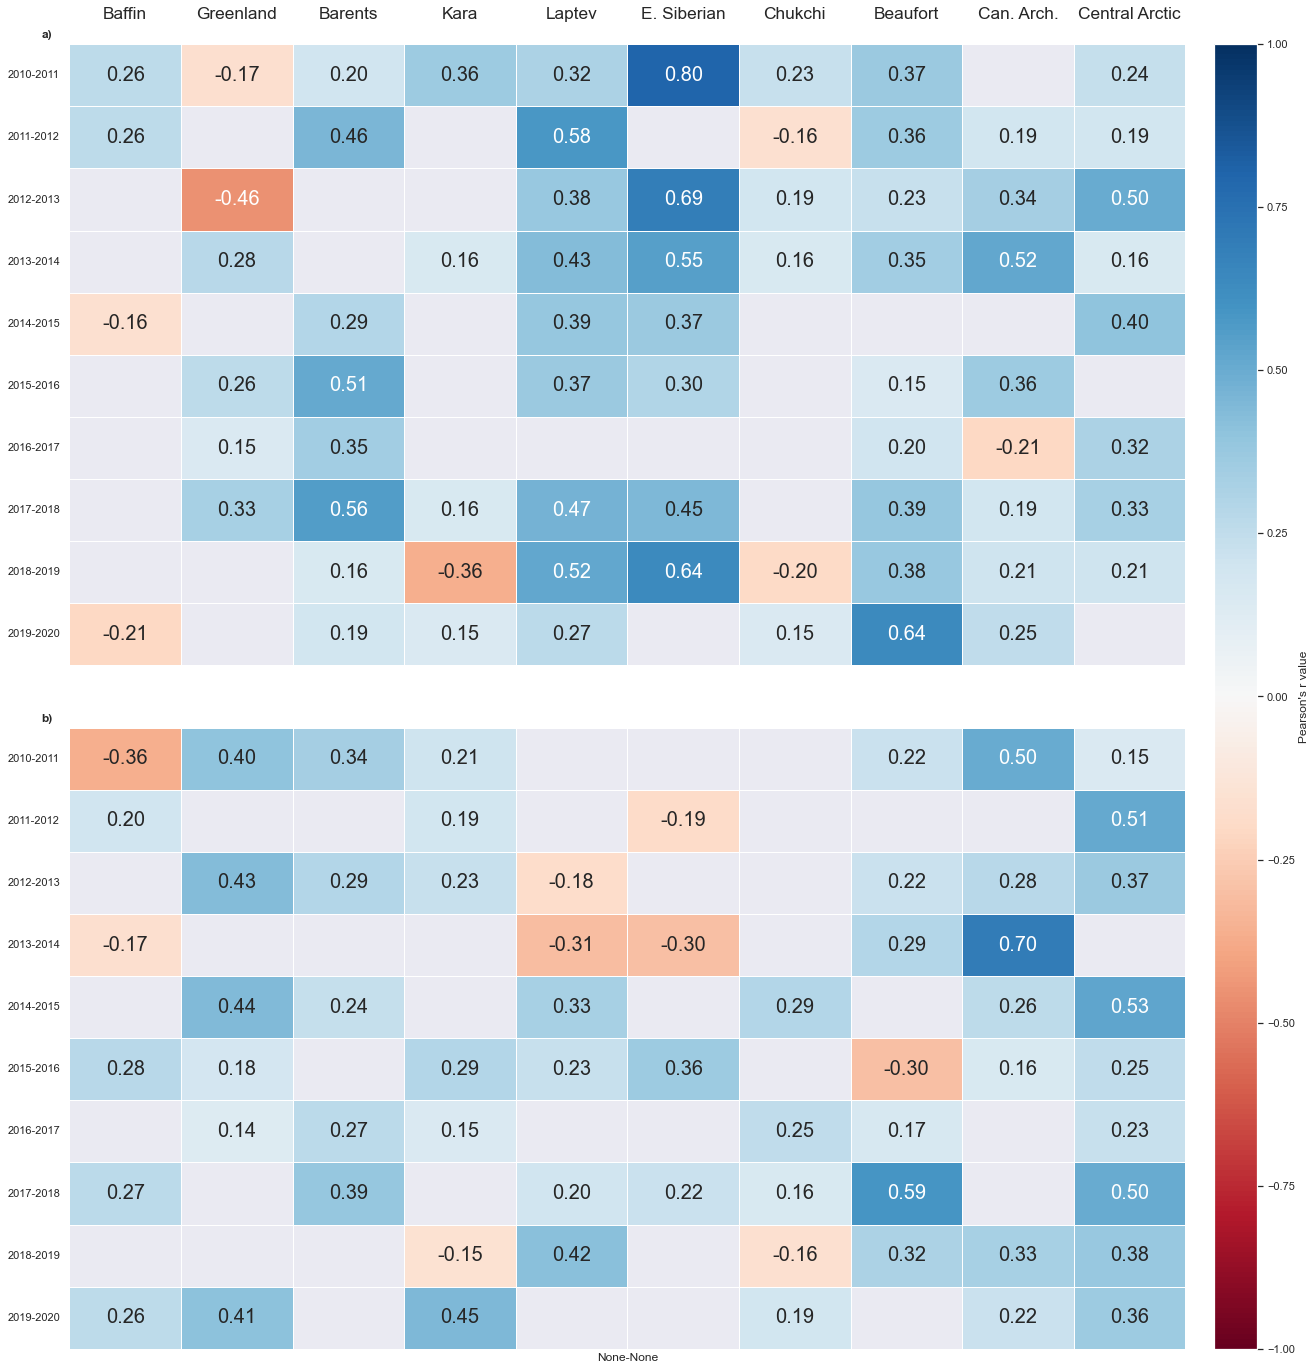

In [19]:
keys = ['Baffin','Greenland','Barents','Kara', 'Laptev', 'E. Siberian', 'Chukchi', 'Beaufort', 'Can. Arch.','Central Arctic']
fig = plt.figure(figsize = (20,24))
sns.set(rc = {'figure.figsize':(20,24)})
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.5,
                         hspace=0.1)

# Temperature
ax1 = fig.add_subplot(spec[0])
mask = ps_temp.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0
ax1 = sns.heatmap(df_temp, mask=mask, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, cbar=None)
ax1.xaxis.tick_top()
ax1.set_xlabel(' ')    
ax1.set_yticklabels(seasons,rotation = 0)
ax1.set_xticklabels(keys,fontsize='x-large',y=1.02)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labeltop=True)
ax1.set_title('a)', x = -0.02,y = 1,fontweight="bold")

# Wind
ax2 = fig.add_subplot(spec[1])
mask = ps_wind.copy()
mask[mask>0.05] = 1000
mask[mask<1000] = 0
ax2 = sns.heatmap(df_wind, mask=mask, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1,linewidths=0.5, annot_kws={"fontsize":20}, cbar=None)
ax2.set_xticks([])
ax2.set_yticklabels(seasons,rotation = 0)
ax2.set_title('b)', x = -0.02,y = 1,fontweight="bold")
    
cbar_ax = fig.add_axes([0.92, 0.125, 0.03, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Pearson's r value")

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/wind_temp_stats.png',bbox_inches = "tight")